In [3]:
from PIL import Image


# Load the large image
def retrieve_images(image_path, start_point):
    large_image = Image.open(image_path)

    # Define parameters
    image_width = 432  # Width of each small image
    # image_height = 431  # Height of each small image
    image_height = 432  # Height of each small image
    horizontal_spacing = 48  # Spacing between images horizontally
    # vertical_spacing = 49  # Spacing between images vertically
    vertical_spacing = 48  # Spacing between images vertically
    num_columns = 2  # Number of columns of small images
    num_rows = 3  # Number of rows of small images
    start_x = start_point[0]
    start_y = start_point[1]

    # Function to extract a small image based on its position
    def extract_small_image(x, y):
        left = start_x + (image_width + horizontal_spacing) * x
        top = start_y + (image_height + vertical_spacing) * y
        right = left + image_width
        bottom = top + image_height
        small_image = large_image.crop((left, top, right, bottom))
        return small_image

    # Extract all small images
    small_images = []
    for x in range(num_columns):
        for y in range(num_rows):
            small_image = extract_small_image(x, y)
            small_images.append(small_image)

    return small_images

In [6]:
import os

for i in range(1, 101):

    # i to string with 4 digits
    bp_id = str(i).zfill(4)
    image_path = f"../data/bpimgs/p{bp_id}.png"
    left_images = retrieve_images(image_path, (9, 9))

    # Save the images
    folder = image_path.split("/")[-1].split(".")[0]
    folder_path = f"../data/bongard-problems-high-res/{folder}"
    os.makedirs(folder_path, exist_ok=True)

    for i, small_image in enumerate(left_images):
        target_path = f"{folder_path}/{i}.png"
        small_image.save(target_path)

    # right images
    right_images = retrieve_images(image_path, (1312, 9))

    # Save the images
    folder = image_path.split("/")[-1].split(".")[0]
    for i, small_image in enumerate(right_images):
        target_path = f"{folder_path}/{i+6}.png"
        small_image.save(target_path)

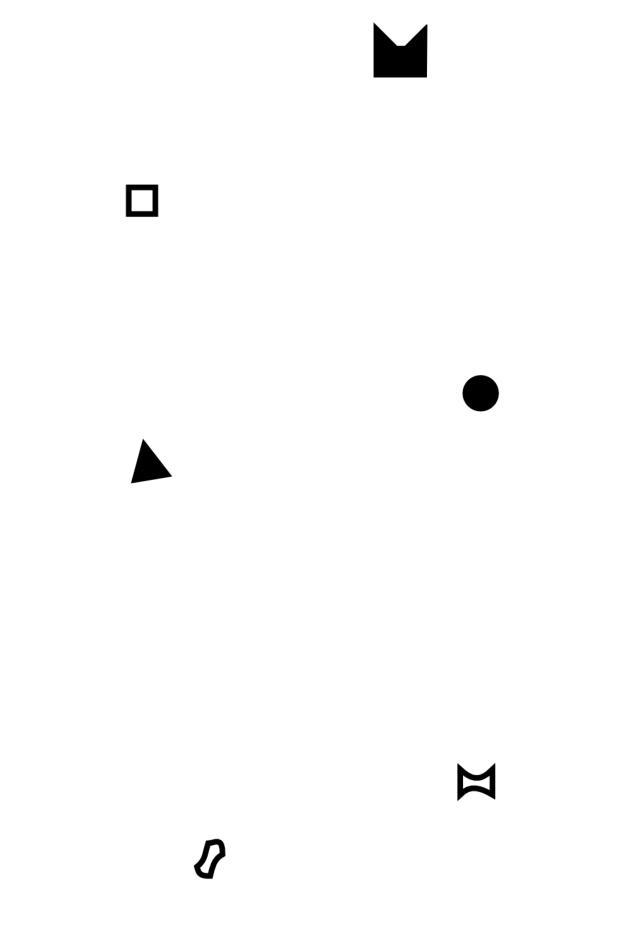